# 海蟒鳗鱼数量动态方程

## 雄性数量动态方程
 $ \frac {dM}{dt} $ = $ \alpha $ R- $ \beta $ M- $ \epsilon $ HM

## 雌性数量动态方程
 $ \frac {dF}{dt} $ = $ \gamma $ R- $ \delta $ F- $ \epsilon $ HF

## 总数量变化方程
 $ \frac {dt}{dt} $ = $ \frac {dM}{dt} $ + $ \frac {dF}{dt} $ 

 $ \frac {dN_ {parasite}}{dt} $ = $ \frac {dM}{dt} $ + $ \frac {dF}{dt} $ 

其中，
- *α*: 雄性相对于资源的生长率
- *β*: 雄性相对于数量的死亡率
- *γ*: 雌性相对于资源的生长率
- *δ*: 雌性相对于数量的死亡率
- *ε*: 海蟒鳗鱼与寄生物相互作用的强度

# 成功繁殖寄生虫数量动态方程

## 成功繁殖数量动态方程
 $ \frac {dB}{tt} $ = $ \rho $ $ p_ {f} $ (1- $ p_ {f} $ )

## 寄生物数量动态方程
 $ \frac {dH}{dt} $ = $ \eta $ P- $ \xi $ HM- $ \zeta $ H

其中，
- *ρ*: 繁殖成功率常数，表示雌性数量 *F* 对成功繁殖数量的影响
- *ξ*: 寄生物对海蟒鳗鱼的寄生率常数，表示寄生物对宿主数量的影响
- *ζ*: 寄生物的自然死亡率常数

# 性别比例计算
 $ p_ {m} $ = $ \frac {M}{P} $ 
 $ p_ {f} $ = $ \frac {F}{P} $

其中，
- *p_m*: 雄性比例
- *p_f*: 雌性比例


$M_ {n+1}=Mn+h  \cdot $ f(tn,yn)


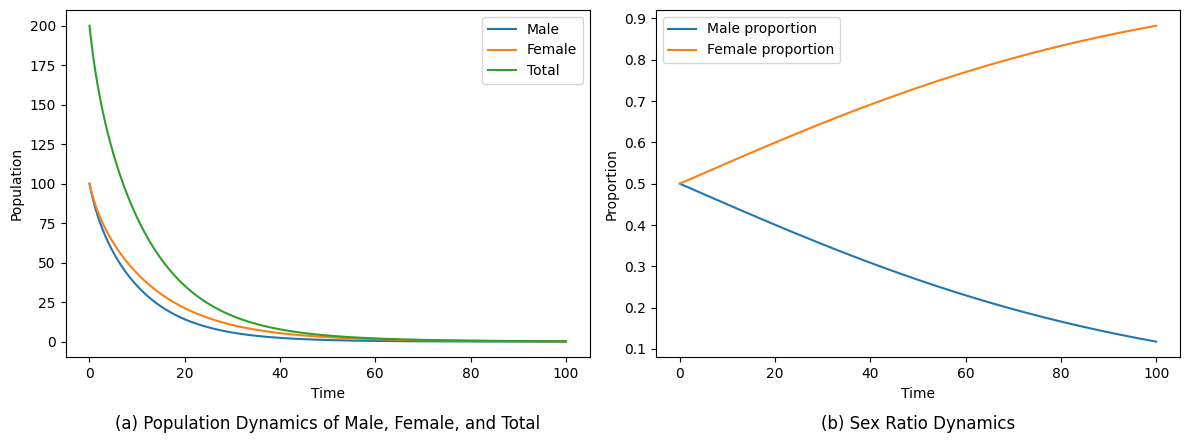

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# 模型参数
alpha = 0.1  # 雄性相对于资源的生长率
beta = 0.05  # 雄性相对于数量的死亡率
gamma = 0.08  # 雌性相对于资源的生长率
delta = 0.03  # 雌性相对于数量的死亡率
rho = 0.02   # 繁殖成功率常数
epsilon = 0.01  # 海蟒鳗鱼与寄生物相互作用的强度
eta = 0.01   # 寄生物攻击宿主的强度
xi = 0.005   # 寄生物对宿主的寄生率
zeta = 0.02  # 寄生物的自然死亡率常数

# 初始条件
M_0 = 100  # 初始雄性数量
F_0 = 100  # 初始雌性数量
P_0 = M_0 + F_0  # 初始总体数量
R_0 = 0.5  # 初始资源可用性
B_0 = 0  # 初始成功繁殖的数量
H_0 = 10  # 初始寄生物数量

# 模拟时间参数
dt = 0.1  # 时间步长
t_max = 100  # 模拟时间
num_steps = int(t_max / dt) + 1

# 初始化数组
time = np.linspace(0, t_max, num_steps)
M = np.zeros(num_steps)
F = np.zeros(num_steps)
P = np.zeros(num_steps)
R = np.zeros(num_steps)
B = np.zeros(num_steps)
H = np.zeros(num_steps)

# 设置初始条件
M[0] = M_0
F[0] = F_0
P[0] = P_0
R[0] = R_0
B[0] = B_0
H[0] = H_0

# Euler 方法求解微分方程
for i in range(1, num_steps):
    p_m = M[i-1] / P[i-1]
    p_f = F[i-1] / P[i-1]

    dM_dt = alpha * R[i-1] - beta * M[i-1] - epsilon * H[i-1] * M[i-1]
    dF_dt = gamma * R[i-1] - delta * F[i-1] - epsilon * H[i-1] * F[i-1]
    dP_dt = dM_dt + dF_dt

    dB_dt = rho * p_f * (1 - p_f)
    dH_dt = eta * P[i-1] - xi * H[i-1] * M[i-1] - zeta * H[i-1]

    M[i] = M[i-1] + dt * dM_dt
    F[i] = F[i-1] + dt * dF_dt
    P[i] = P[i-1] + dt * dP_dt
    B[i] = B[i-1] + dt * dB_dt
    H[i] = H[i-1] + dt * dH_dt

# 性别比例计算
p_m = M / P
p_f = F / P

# 绘制图形
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(time, M, label='Male')
plt.plot(time, F, label='Female')
plt.plot(time, P, label='Total')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('(a) Population Dynamics of Male, Female, and Total',y=-0.23)

plt.subplot(2, 2, 2)
plt.plot(time, p_m, label='Male proportion')
plt.plot(time, p_f, label='Female proportion')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.legend()
plt.title('(b) Sex Ratio Dynamics',y=-0.23)

plt.tight_layout()
plt.show()


With a sex ratio of 0.5, the final parasite population is 0.37961330766704443 and the final host population is 1.1184094544082055.
With a sex ratio of 0.7, the final parasite population is 0.45942029281057845 and the final host population is 0.9093749358900328.
With a sex ratio of 0.9, the final parasite population is 0.3516606757660771 and the final host population is 0.7074784271736361.


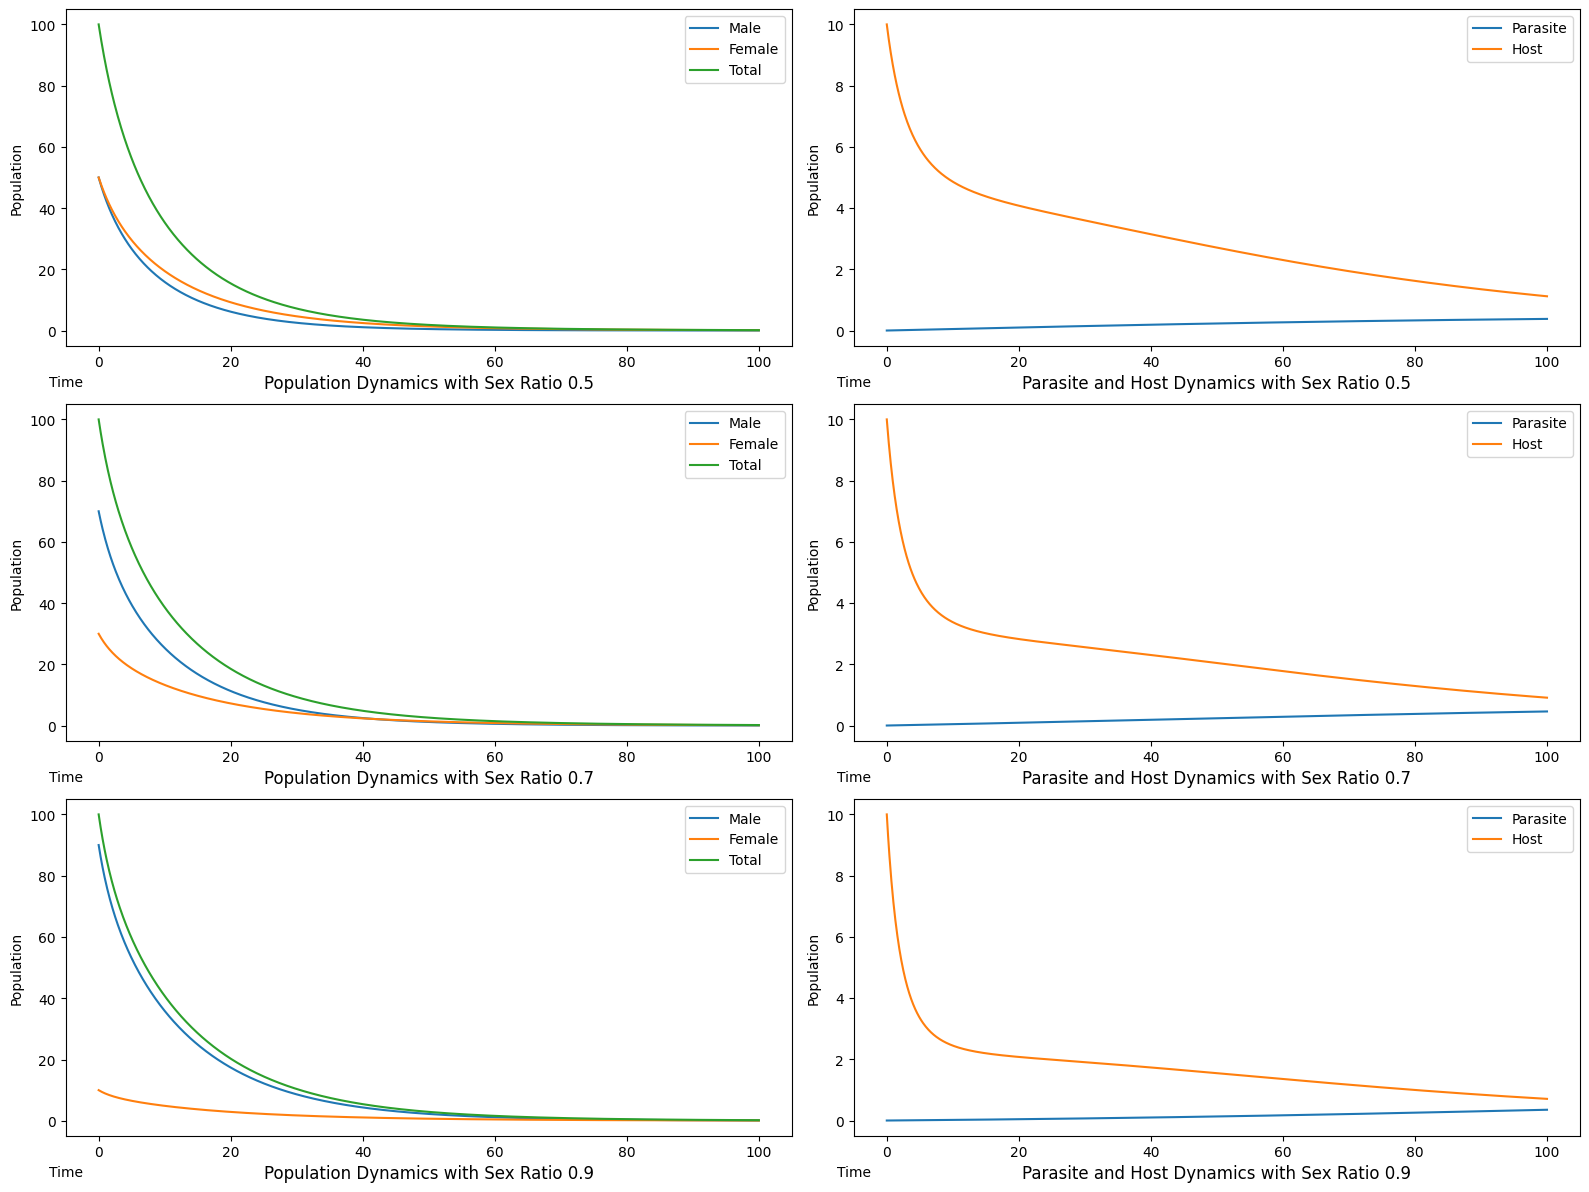

In [57]:
# 定义不同的性别比例
sex_ratio_list = [0.5, 0.7, 0.9]  # 三种不同的性别比例

# 初始化图形
plt.figure(figsize=(16, 12))

for sex_ratio in sex_ratio_list:
    # 重新设置初始条件
    M[0] = M_0 * sex_ratio
    F[0] = M_0 * (1 - sex_ratio)
    P[0] = M[0] + F[0]
    R[0] = R_0
    B[0] = B_0
    H[0] = H_0

    # 重新计算性别比例
    p_m = M / P
    p_f = F / P

    # Euler 方法求解微分方程
    for i in range(1, num_steps):
        p_m = M[i-1] / P[i-1]
        p_f = F[i-1] / P[i-1]

        dM_dt = alpha * R[i-1] - beta * M[i-1] - epsilon * H[i-1] * M[i-1]
        dF_dt = gamma * R[i-1] - delta * F[i-1] - epsilon * H[i-1] * F[i-1]
        dP_dt = dM_dt + dF_dt

        dB_dt = rho * p_f * (1 - p_f)
        dH_dt = eta * P[i-1] - xi * H[i-1] * M[i-1] - zeta * H[i-1]

        M[i] = M[i-1] + dt * dM_dt
        F[i] = F[i-1] + dt * dF_dt
        P[i] = P[i-1] + dt * dP_dt
        B[i] = B[i-1] + dt * dB_dt
        H[i] = H[i-1] + dt * dH_dt

    # 绘制图形
    plt.subplot(3, 2, sex_ratio_list.index(sex_ratio) * 2 + 1)
    plt.plot(time, M, label='Male')
    plt.plot(time, F, label='Female')
    plt.plot(time, P, label='Total')
    plt.xlabel('Time',x=0)
    plt.ylabel('Population')
    plt.legend()
    plt.title(f'Population Dynamics with Sex Ratio {sex_ratio}',y=-0.15)

    plt.subplot(3, 2, sex_ratio_list.index(sex_ratio) * 2 + 2)
    plt.plot(time, B, label='Parasite')
    plt.plot(time, H, label='Host')
    plt.xlabel('Time',x=0)
    plt.ylabel('Population')
    plt.legend()
    plt.title(f'Parasite and Host Dynamics with Sex Ratio {sex_ratio}',y=-0.15)

    # 分析性别比例对寄生物种群的影响
    final_parasite_population = B[-1]
    final_host_population = H[-1]
    advantage_statement = (
        f"With a sex ratio of {sex_ratio}, the final parasite population is {final_parasite_population} "
        f"and the final host population is {final_host_population}."
    )
    print(advantage_statement)

plt.tight_layout()
plt.show()

With a sex ratio of 0.5, the final parasite population is 0.37961330766704443, final host population is 1.1184094544082055, final food quantity is 11.456460594219442, and final predator quantity is 7.080039930525082.
With a sex ratio of 0.7, the final parasite population is 0.45942029281057845, final host population is 0.9093749358900328, final food quantity is 11.456460594219442, and final predator quantity is 7.080039930525082.
With a sex ratio of 0.9, the final parasite population is 0.3516606757660771, final host population is 0.7074784271736361, final food quantity is 11.456460594219442, and final predator quantity is 7.080039930525082.


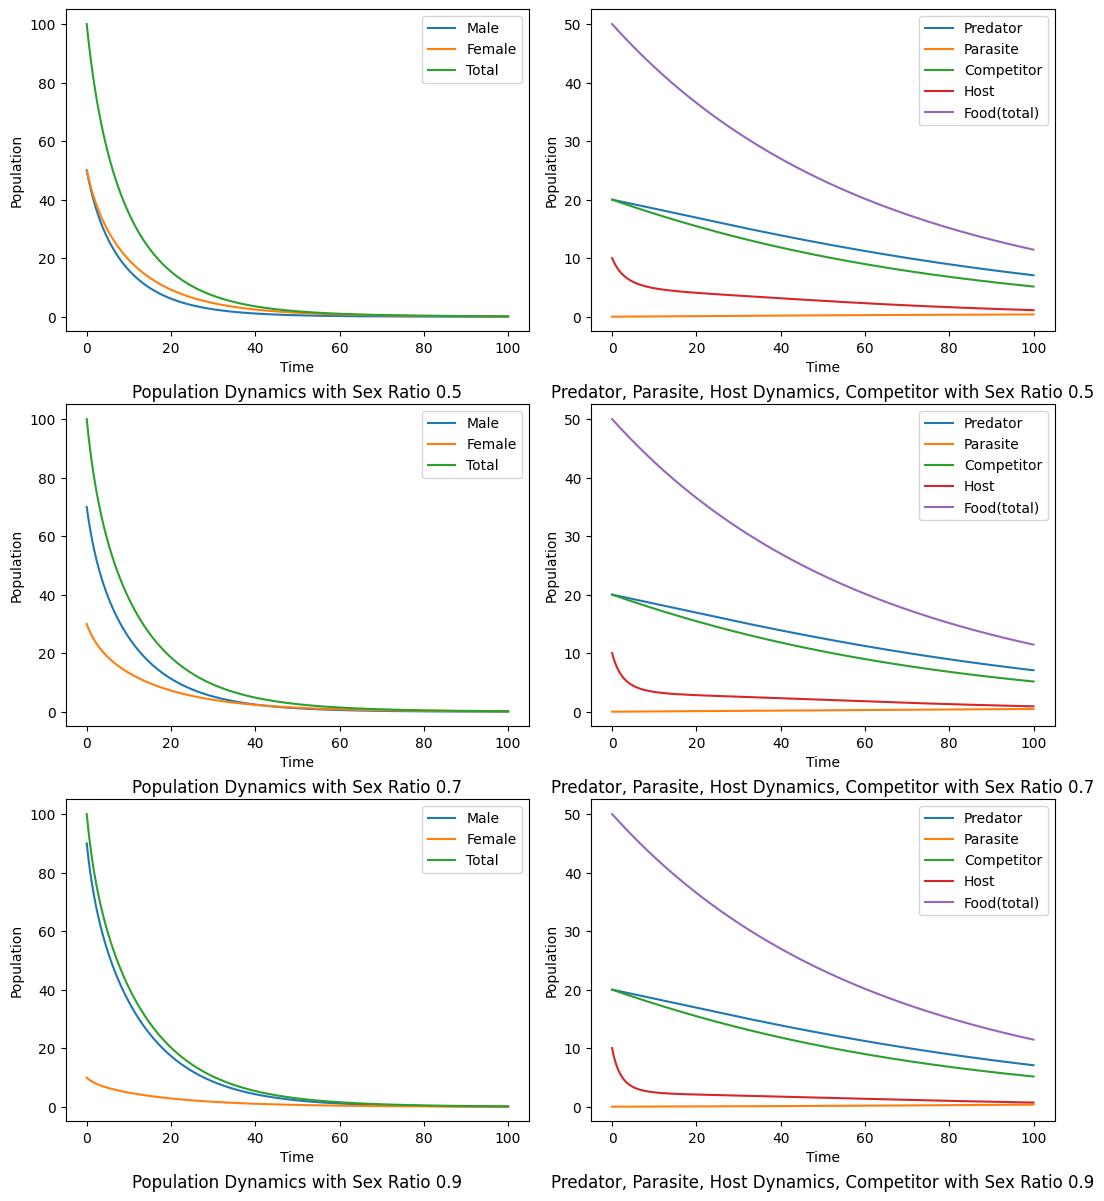

In [58]:
# Define different sex ratios
sex_ratio_list = [0.5,0.7,0.9]  # Three different sex ratios

# Initialize figure
plt.figure(figsize=(16, 12))

for sex_ratio in sex_ratio_list:
    # Reset initial conditions
    M[0] = M_0 * sex_ratio
    F[0] = M_0 * (1 - sex_ratio)
    P[0] = M[0] + F[0]
    R[0] = R_0
    B[0] = B_0
    H[0] = H_0
    # Add initial conditions for other ecological components
    C_0 = 50  # Initial food quantity
    D_0 = 20  # Initial predator quantity
    CO_0 = 20  # Initial competitor quantity
    C = np.zeros(num_steps)
    D = np.zeros(num_steps)
    CO = np.zeros(num_steps)
    C[0] = C_0
    D[0] = D_0
    CO[0] = CO_0

    # Recalculate sex ratios
    p_m = M / P
    p_f = F / P

    # Euler method to solve differential equations
    for i in range(1, num_steps):
        p_m = M[i-1] / P[i-1]
        p_f = F[i-1] / P[i-1]

        dM_dt = alpha * R[i-1] - beta * M[i-1] - epsilon * H[i-1] * M[i-1]
        dF_dt = gamma * R[i-1] - delta * F[i-1] - epsilon * H[i-1] * F[i-1]
        dP_dt = dM_dt + dF_dt

        dB_dt = rho * p_f * (1 - p_f)
        dH_dt = eta * P[i-1] - xi * H[i-1] * M[i-1] - zeta * H[i-1]

        # Add dynamic equations for other ecological components
        dC_dt = -0.02 * C[i-1] + 0.01 * D[i-1]  # Food quantity dynamic equation
        dD_dt = 0.005 * C[i-1] - 0.02 * D[i-1]  # Predator quantity dynamic equation
        dCO_dt = 0.005 * C[i-1] - 0.025 * CO[i-1]  # Competitor quantity dynamic equation

        M[i] = M[i-1] + dt * dM_dt
        F[i] = F[i-1] + dt * dF_dt
        P[i] = P[i-1] + dt * dP_dt
        B[i] = B[i-1] + dt * dB_dt
        H[i] = H[i-1] + dt * dH_dt
        # Update quantities for other ecological components
        C[i] = C[i-1] + dt * dC_dt
        D[i] = D[i-1] + dt * dD_dt
        CO[i] = CO[i-1] + dt * dCO_dt

    # Plotting
    plt.subplot(3, 3, sex_ratio_list.index(sex_ratio) * 3 + 1)
    plt.plot(time, M, label='Male')
    plt.plot(time, F, label='Female')
    plt.plot(time, P, label='Total')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title(f'Population Dynamics with Sex Ratio {sex_ratio}',y=-0.23)

    plt.subplot(3, 3, sex_ratio_list.index(sex_ratio) * 3 + 2)
    plt.plot(time, D, label='Predator')
    plt.plot(time, B, label='Parasite')
    plt.plot(time, CO, label='Competitor')
    plt.plot(time, H, label='Host')
    plt.plot(time, C, label='Food(total)')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title(f'Predator, Parasite, Host Dynamics, Competitor with Sex Ratio {sex_ratio}',y=-0.23)

    """
    # Plot other ecological components
    plt.subplot(3, 3, sex_ratio_list.index(sex_ratio) * 3 + 3)
    plt.plot(time, C, label='Food')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend()
    plt.title(f'Other Ecological Components Dynamics with Sex Ratio {sex_ratio}')
    """
    # Analyze the impact of sex ratios on the parasite and other components
    final_parasite_population = B[-1]
    final_host_population = H[-1]
    final_food_population = C[-1]
    final_predator_population = D[-1]
    advantage_statement = (
        f'With a sex ratio of {sex_ratio}, the final parasite population is {final_parasite_population}, '
        f'final host population is {final_host_population}, final food quantity is {final_food_population}, '
        f'and final predator quantity is {final_predator_population}.'
    )
    print(advantage_statement)

plt.tight_layout()
plt.show()


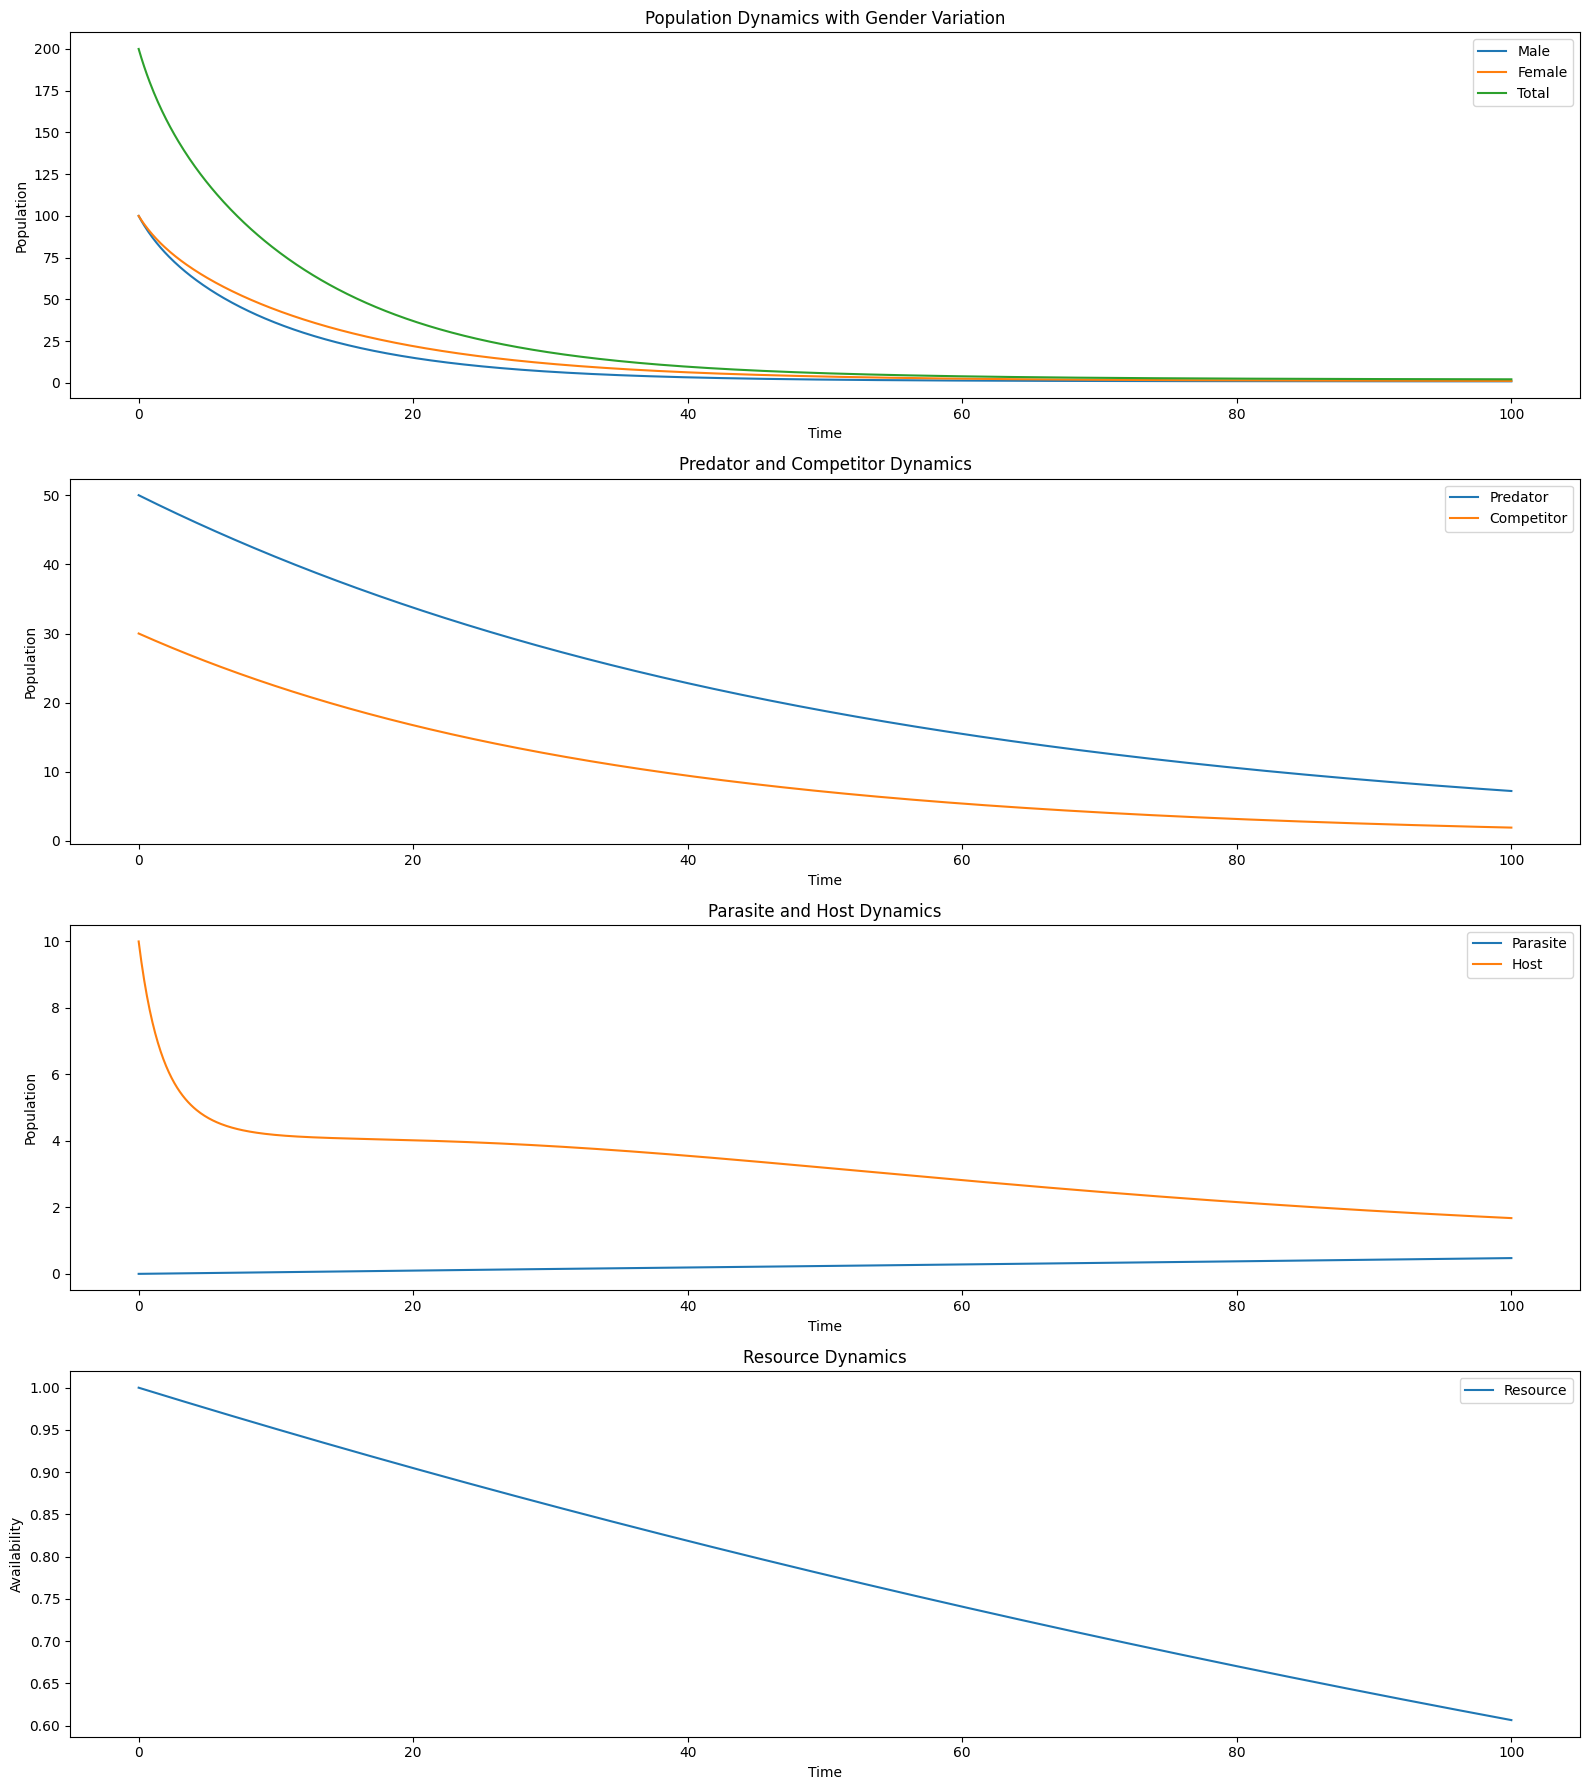

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# 模型参数
alpha = 0.1  # 雄性相对于资源的生长率
beta = 0.05  # 雄性相对于数量的死亡率
gamma = 0.08  # 雌性相对于资源的生长率
delta = 0.03  # 雌性相对于数量的死亡率
rho = 0.02   # 繁殖成功率常数
epsilon = 0.01  # 海蟒鳗鱼与寄生物相互作用的强度
eta = 0.01   # 寄生物攻击宿主的强度
xi = 0.005   # 寄生物对宿主的寄生率
zeta = 0.02  # 寄生物的自然死亡率常数

# 模型参数 - 新增的生态组件
alpha_c = 0.015  # 捕食者相对于资源的生长率
beta_c = 0.02   # 捕食者相对于数量的死亡率
alpha_com = 0.02  # 竞争者相对于资源的生长率
beta_com = 0.03  # 竞争者相对于数量的死亡率

# 初始条件
M_0 = 100  # 初始雄性数量
F_0 = 100  # 初始雌性数量
P_0 = M_0 + F_0  # 初始总体数量
R_0 = 1.0  # 初始资源可用性，这里修改为 1.0
B_0 = 0  # 初始成功繁殖的数量
H_0 = 10  # 初始寄生物数量
C_0 = 50  # 初始捕食者数量
Co_0 = 30  # 初始竞争者数量

# 模拟时间参数
dt = 0.1  # 时间步长
t_max = 100  # 模拟时间
num_steps = int(t_max / dt) + 1

# 初始化数组
time = np.linspace(0, t_max, num_steps)
M = np.zeros(num_steps)
F = np.zeros(num_steps)
P = np.zeros(num_steps)
R = np.zeros(num_steps)
B = np.zeros(num_steps)
H = np.zeros(num_steps)
C = np.zeros(num_steps)
Co = np.zeros(num_steps)

# 设置初始条件
M[0] = M_0
F[0] = F_0
P[0] = P_0
R[0] = R_0
B[0] = B_0
H[0] = H_0
C[0] = C_0
Co[0] = Co_0

# Euler 方法求解微分方程
for i in range(1, num_steps):
    p_m = M[i-1] / P[i-1]
    p_f = F[i-1] / P[i-1]

    # 修改资源可用性的动态方程
    dR_dt = -0.005 * R[i-1]  # 举例，可以根据需要调整
    R[i] = R[i-1] + dt * dR_dt

    dM_dt = alpha * R[i-1] - beta * M[i-1] - epsilon * H[i-1] * M[i-1]
    dF_dt = gamma * R[i-1] - delta * F[i-1] - epsilon * H[i-1] * F[i-1]
    dP_dt = dM_dt + dF_dt

    dB_dt = rho * p_f * (1 - p_f)
    dH_dt = eta * P[i-1] - xi * H[i-1] * M[i-1] - zeta * H[i-1]

    # 新增的生态组件的动态方程
    dC_dt = alpha_c * R[i-1] - beta_c * C[i-1]
    dCo_dt = alpha_com * R[i-1] - beta_com * Co[i-1]

    M[i] = M[i-1] + dt * dM_dt
    F[i] = F[i-1] + dt * dF_dt
    P[i] = P[i-1] + dt * dP_dt
    B[i] = B[i-1] + dt * dB_dt
    H[i] = H[i-1] + dt * dH_dt
    C[i] = C[i-1] + dt * dC_dt
    Co[i] = Co[i-1] + dt * dCo_dt

# 绘制图形
plt.figure(figsize=(16, 18))

# 绘制性别变化图
plt.subplot(4, 1, 1)
plt.plot(time, M, label='Male')
plt.plot(time, F, label='Female')
plt.plot(time, P, label='Total')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Population Dynamics with Gender Variation')

# 绘制捕食者和竞争者图
plt.subplot(4, 1, 2)
plt.plot(time, C, label='Predator')
plt.plot(time, Co, label='Competitor')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Predator and Competitor Dynamics')

# 绘制寄生虫和宿主图
plt.subplot(4, 1, 3)
plt.plot(time, B, label='Parasite')
plt.plot(time, H, label='Host')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Parasite and Host Dynamics')

# 绘制资源图
plt.subplot(4, 1, 4)
plt.plot(time, R, label='Resource')
plt.xlabel('Time')
plt.ylabel('Availability')
plt.legend()
plt.title('Resource Dynamics')

plt.tight_layout()
plt.show()
